In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df_main = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataClustering.csv')

In [ ]:
df_main.shape

(351, 4)

In [ ]:
df_main.head()

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


## Visualization
(density plots and 2D TSNE)

### 1. Density Plots and transformations
---

Ref: https://seaborn.pydata.org/generated/seaborn.displot.html

#### 1. Column x1

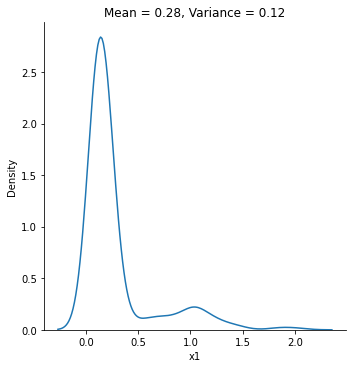

In [ ]:
sns.displot(df_main.x1, kind = 'kde')
plt.title('Mean = {}, Variance = {}'.format(np.round(np.mean(df_main.x1), 2), np.round(np.var(df_main.x1), 2)))
plt.show()

**Observation** : Right skewed

> Apply Log transform

In [ ]:
x1_log = np.log(np.array(df_main.x1))

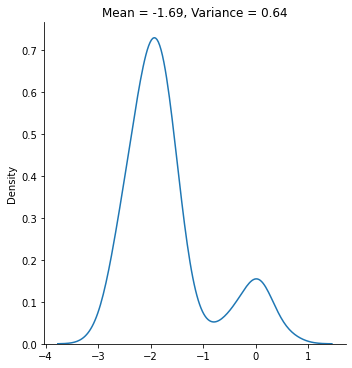

In [ ]:
sns.displot(x1_log, kind='kde')
plt.title('Mean = {}, Variance = {}'.format(np.round(np.mean(x1_log), 2), np.round(np.var(x1_log), 2)))
plt.show()

#### 2. Column x2

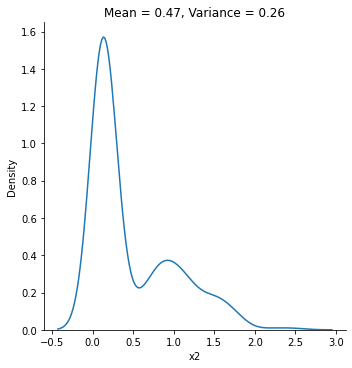

In [ ]:
sns.displot(df_main.x2, kind='kde')
plt.title('Mean = {}, Variance = {}'.format(np.round(np.mean(df_main.x2), 2), np.round(np.var(df_main.x2), 2)))
plt.show()

**Observation** : Right skewed

> Apply Log transform

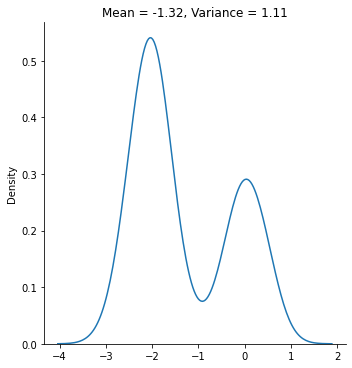

In [ ]:
x2_log = np.log(np.array(df_main.x2))
sns.displot(x2_log, kind='kde')
plt.title('Mean = {}, Variance = {}'.format(np.round(np.mean(x2_log), 2), np.round(np.var(x2_log), 2)))
plt.show()

#### 3. Column x3

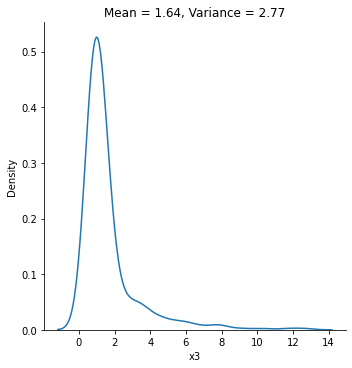

In [ ]:
sns.displot(df_main.x3, kind='kde')
plt.title('Mean = {}, Variance = {}'.format(np.round(np.mean(df_main.x3), 2), np.round(np.var(df_main.x3), 2)))
plt.show()

**Observation** : Right skewed

> Apply log transform

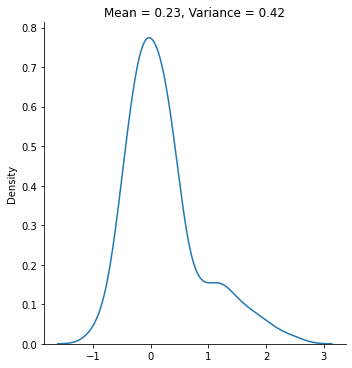

In [ ]:
x3_log = np.log(np.array(df_main.x3))
sns.displot(x3_log, kind='kde')
plt.title('Mean = {}, Variance = {}'.format(np.round(np.mean(x3_log), 2), np.round(np.var(x3_log), 2)))
plt.show()

#### 4. Column x4

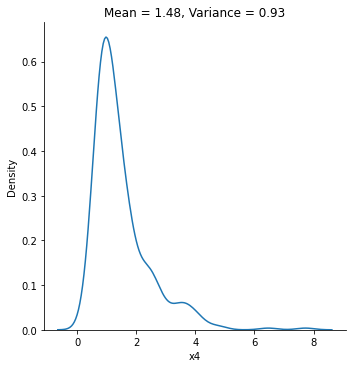

In [ ]:
sns.displot(df_main.x4, kind='kde')
plt.title('Mean = {}, Variance = {}'.format(np.round(np.mean(df_main.x4), 2), np.round(np.var(df_main.x4), 2)))
plt.show()

Observation : Right skewed

> Apply log transform

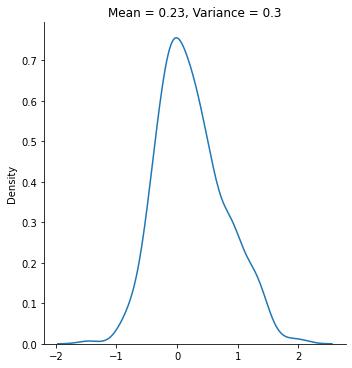

In [ ]:
x4_log = np.log(np.array(df_main.x4))
sns.displot(x4_log, kind='kde')
plt.title('Mean = {}, Variance = {}'.format(np.round(np.mean(x4_log), 2), np.round(np.var(x4_log), 2)))
plt.show()

#### Replace all columns by their log transforms

In [ ]:
# create a copy of original dataframe
df_transformed = df_main.copy(deep=True)

In [ ]:
# Replace every column by its log transform
for col in df_transformed.columns:
  df_transformed[col] = np.log(df_transformed[col])

#### Data Normalization

In [ ]:
from sklearn import preprocessing

In [ ]:
# Use standard scaler
scaler = preprocessing.StandardScaler()
scaler.fit(df_transformed) # compute mean and std
df_scaled = scaler.transform(df_transformed) # scale using the computed mean and std

### 2. Visualizing data using 2D TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


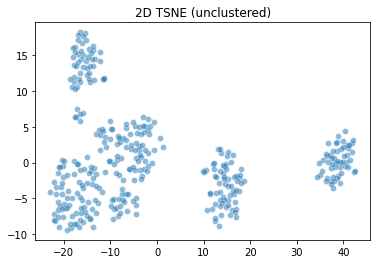

In [ ]:
from sklearn.manifold import TSNE
# given reference below is used to set the argument values for TSNE
tsne = TSNE(n_components = 2, perplexity=30, learning_rate = 'auto', init = 'pca')
# fit the tsne transform to df_scaled and get the final 2 dimensions representation
tsne_dims = tsne.fit_transform(df_scaled)
# scatter plot of the corresponding 2D points
sns.scatterplot(x=tsne_dims[:,0], y=tsne_dims[:,1], alpha = 0.5)
plt.title('2D TSNE (unclustered)')
plt.show()

Reference : https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

## K Means Clustering

In [ ]:
# importing required libraries
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
# k_range comprises of the potential k values to be tried for k means clustering
# the range of 2 to 12 is inferred as suitable by observing the 2D TSNE plot above
k_range = np.arange(2,12)
# total_k is the total no of k values to be tried
total_k = k_range.shape[0]
# define a zero array of size total_k to store the Davies Bouldin score for various k
db_score = np.zeros(total_k)
# labels array consists of final label information obtained from clustering for various k values
labels = np.zeros((df_scaled.shape[0], total_k))

#perform k means clustering for all values of k in k_range and
#update the db_score and labels array for each k
for i in range(0,total_k):
  kmeans = KMeans(n_clusters = k_range[i])
  labels[:,i] = kmeans.fit_predict(df_scaled)
  db_score[i] = metrics.davies_bouldin_score(df_scaled, labels[:,i])

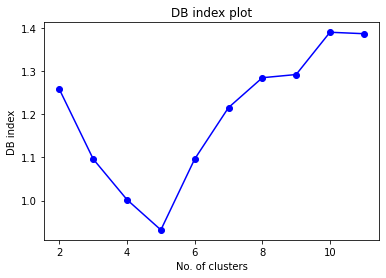

In [ ]:
#plot the db_score vs no of clusters (k)
plt.plot(k_range, db_score, 'b-o')
plt.title('DB index plot')
plt.xlabel('No. of clusters')
plt.ylabel('DB index')
plt.show()

**Observation :** DB index minima obtained at k=5. This implies appropriate number of clusters is 5.

## Visualizing clusters using 2D TSNE

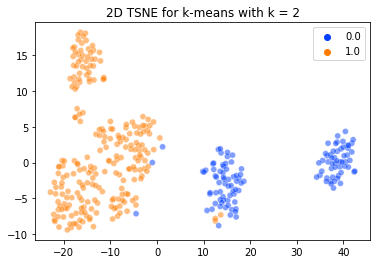

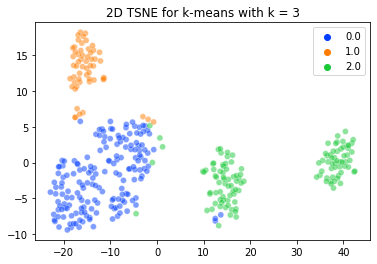

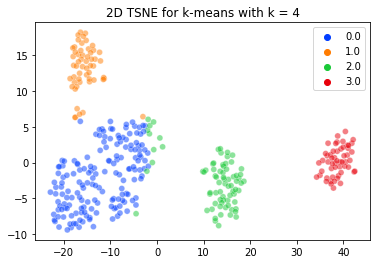

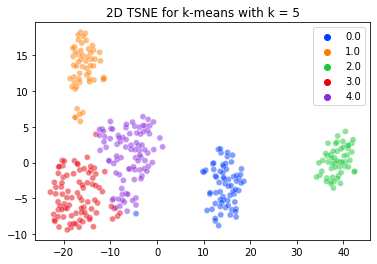

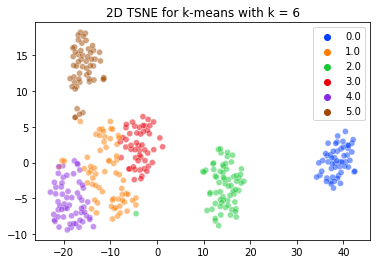

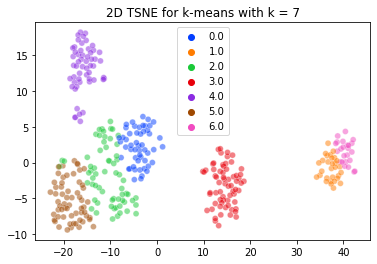

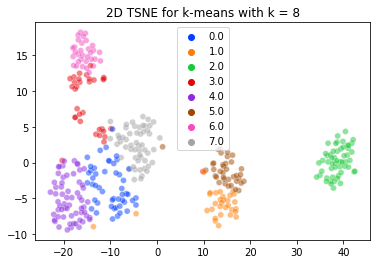

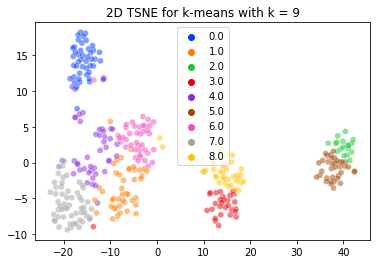

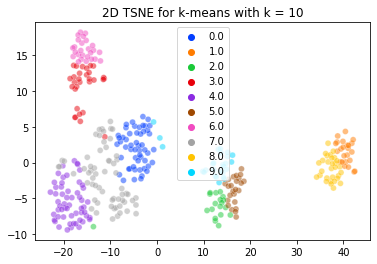

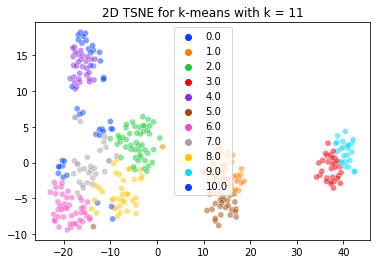

In [ ]:
# observe the clusters in the 2D TSNE embedding, for various no. of clusters
# labels[:,i] contain the label information for all points, when i clusters are used in the k-means algo
for i in range(0, total_k):
  sns.scatterplot(x = tsne_dims[:,0], y = tsne_dims[:,1], hue = labels[:,i], palette = 'bright', alpha = 0.5)
  plt.title('2D TSNE for k-means with k = {}'.format(k_range[i]))
  plt.show()

**Observation :** The data looks well separated in the 2D TSNE plot for all k values